In [425]:
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import time
import os
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [270]:
weratedogs_twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')
weratedogs_twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [271]:
# URL given by Udacity project
image_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(image_url)

# Save file in current directory
with open(os.path.join(os.getcwd(),
                       image_url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [32]:
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

For submission:

consumer_key = 'YOUR CONSUMER KEY'

consumer_secret = 'YOUR CONSUMER SECRET'

access_token = 'YOUR ACCESS TOKEN'

access_secret = 'YOUR ACCESS SECRET'

In [4]:
# Set up access to Twitter API
consumer_key = '5nbSsQVBgOm2iTyx5kEAOgYbc'
consumer_secret = 'hVKqBwSYqp84FLu7r4yNK8SsfQo14176gNKEo0HivmwnvzieNL'
access_token = '38113604-38113604-DRtyYpGidP2qDXyDde1EZ2oOteMgbBq9gJWftOQqd'
access_secret = 'rjnMpsnk9kDL051G7GcMqJSB9pBLoXb962t1LFGAyJTyE'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAPrwcQEAAAAA4d%2Be1JGAvCQKhBe%2B8FXJrjx02q4%3DhHf6kvqXAysIKODTt2gc5EfcyZdvCQ1z3dsb2qaBbLMWPYn1gW'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#client = tweepy.Client(consumer_key, consumer_secret, access_token, access_secret, wait_on_rate_limit=True)
client = tweepy.Client(bearer_token = bearer_token, wait_on_rate_limit=True)

In [9]:
""" 
This function takes the tweet Object from below and flattens into a dictionary
where all the relevant information for the JSON file is a top-level dictionary

Input: tweet (tweet Oject)
tweet consists of two values
id: string, id of the tweet
public_metrics: dictionary of public_metrics

Output: tweet_dict
tweet_dict with key/value pairs: id, retweet_count, like_count

"""

def tweet_flatten(tweet):
    
    if tweet is None:
        return Error 
    
    tweet_dict = {'id': tweet.data['id'],
                 'retweet_count': tweet.data['public_metrics']['retweet_count'],
                 'like_count': tweet.data['public_metrics']['like_count']}
    
    return tweet_dict
    

### WARNING: Due to the change in Twitter's API (v 1.1 to v2), the method to pull tweet has changed and is rate limited to 25 pulls per 15 mins.  This following code takes ~2 hours to run!

In [11]:
#tweet_test = weratedogs_twitter_arch.sample().tweet_id.values[0]
tweet_ids = weratedogs_twitter_arch.tweet_id.values

tweet_fields = ['id', 'public_metrics']
tweet_dict = {}
fails_dict = {}

start = time.time()

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ': ' + str(tweet_id))
        try:
            tweet = client.get_tweet(id = tweet_id, tweet_fields = tweet_fields)
            print('Success!')
            tweet_dict = tweet_flatten(tweet)
            print(tweet_dict)
            json.dump(tweet_dict, outfile)
            outfile.write('\n')
        except Exception as e:
            print('Fail!')
            fails_dict[tweet_id] = e
            print (e)
            pass
        
end = time.time()
print(end - start)
print(fails_dict)

Rate limit exceeded. Sleeping for 482 seconds.


2: 892420643555336193
Success!
{'id': 892420643555336193, 'retweet_count': 7049, 'like_count': 33918}
3: 892177421306343426
Success!
{'id': 892177421306343426, 'retweet_count': 5321, 'like_count': 29393}
4: 891815181378084864
Success!
{'id': 891815181378084864, 'retweet_count': 3502, 'like_count': 22114}
5: 891689557279858688
Success!
{'id': 891689557279858688, 'retweet_count': 7257, 'like_count': 37030}
6: 891327558926688256
Success!
{'id': 891327558926688256, 'retweet_count': 7798, 'like_count': 35398}
7: 891087950875897856
Success!
{'id': 891087950875897856, 'retweet_count': 2611, 'like_count': 17854}
8: 890971913173991426
Success!
{'id': 890971913173991426, 'retweet_count': 1677, 'like_count': 10401}
9: 890729181411237888
Success!
{'id': 890729181411237888, 'retweet_count': 15836, 'like_count': 57003}
10: 890609185150312448
Success!
{'id': 890609185150312448, 'retweet_count': 3638, 'like_count': 24583}
11: 890240255349198849
Success!
{'id': 890240255349198849, 'retweet_count': 6131

Success!
{'id': 877201837425926144, 'retweet_count': 4658, 'like_count': 23913}
84: 876838120628539392
Success!
{'id': 876838120628539392, 'retweet_count': 2819, 'like_count': 18267}
85: 876537666061221889
Success!
{'id': 876537666061221889, 'retweet_count': 4003, 'like_count': 21098}
86: 876484053909872640
Success!
{'id': 876484053909872640, 'retweet_count': 2011, 'like_count': 16602}
87: 876120275196170240
Success!
{'id': 876120275196170240, 'retweet_count': 3922, 'like_count': 24746}
88: 875747767867523072
Success!
{'id': 875747767867523072, 'retweet_count': 3600, 'like_count': 22173}
89: 875144289856114688
Success!
{'id': 875144289856114688, 'retweet_count': 4173, 'like_count': 19451}
90: 875097192612077568
Success!
{'id': 875097192612077568, 'retweet_count': 5147, 'like_count': 24311}
91: 875021211251597312
Success!
{'id': 875021211251597312, 'retweet_count': 4004, 'like_count': 22605}
92: 874680097055178752
Success!
{'id': 874680097055178752, 'retweet_count': 3938, 'like_count': 

Success!
{'id': 860524505164394496, 'retweet_count': 4635, 'like_count': 21337}
165: 860276583193509888
Success!
{'id': 860276583193509888, 'retweet_count': 3091, 'like_count': 16632}
166: 860184849394610176
Success!
{'id': 860184849394610176, 'retweet_count': 5153, 'like_count': 15062}
167: 860177593139703809
Success!
{'id': 860177593139703809, 'retweet_count': 26918, 'like_count': 0}
168: 859924526012018688
Success!
{'id': 859924526012018688, 'retweet_count': 3603, 'like_count': 17695}
169: 859851578198683649
Success!
{'id': 859851578198683649, 'retweet_count': 3086, 'like_count': 14014}
170: 859607811541651456
Success!
{'id': 859607811541651456, 'retweet_count': 1369, 'like_count': 16887}
171: 859196978902773760
Success!
{'id': 859196978902773760, 'retweet_count': 26430, 'like_count': 80836}
172: 859074603037188101
Success!
{'id': 859074603037188101, 'retweet_count': 12032, 'like_count': 30540}
173: 858860390427611136
Success!
{'id': 858860390427611136, 'retweet_count': 7117, 'like_

Success!
{'id': 846139713627017216, 'retweet_count': 9229, 'like_count': 28929}
246: 846042936437604353
Success!
{'id': 846042936437604353, 'retweet_count': 2604, 'like_count': 14872}
247: 845812042753855489
Success!
{'id': 845812042753855489, 'retweet_count': 7923, 'like_count': 27157}
248: 845677943972139009
Success!
{'id': 845677943972139009, 'retweet_count': 4412, 'like_count': 23513}
249: 845459076796616705
Success!
Fail!
'NoneType' object is not subscriptable
250: 845397057150107648
Success!
{'id': 845397057150107648, 'retweet_count': 1630, 'like_count': 7119}
251: 845306882940190720
Success!
{'id': 845306882940190720, 'retweet_count': 4898, 'like_count': 21712}
252: 845098359547420673
Success!
{'id': 845098359547420673, 'retweet_count': 6993, 'like_count': 0}
253: 844979544864018432
Success!
{'id': 844979544864018432, 'retweet_count': 2326, 'like_count': 12737}
254: 844973813909606400
Success!
{'id': 844973813909606400, 'retweet_count': 2878, 'like_count': 13997}
255: 8447047884

Rate limit exceeded. Sleeping for 876 seconds.


Success!
{'id': 836989968035819520, 'retweet_count': 2130, 'like_count': 12001}
302: 836753516572119041
Success!
{'id': 836753516572119041, 'retweet_count': 4291, 'like_count': 18201}
303: 836677758902222849
Success!
{'id': 836677758902222849, 'retweet_count': 2040, 'like_count': 11886}
304: 836648853927522308
Success!
{'id': 836648853927522308, 'retweet_count': 509, 'like_count': 0}
305: 836397794269200385
Success!
{'id': 836397794269200385, 'retweet_count': 25247, 'like_count': 0}
306: 836380477523124226
Success!
{'id': 836380477523124226, 'retweet_count': 2767, 'like_count': 13963}
307: 836260088725786625
Success!
{'id': 836260088725786625, 'retweet_count': 4006, 'like_count': 20038}
308: 836001077879255040
Success!
{'id': 836001077879255040, 'retweet_count': 3920, 'like_count': 17975}
309: 835685285446955009
Success!
{'id': 835685285446955009, 'retweet_count': 7489, 'like_count': 0}
310: 835574547218894849
Success!
{'id': 835574547218894849, 'retweet_count': 3326, 'like_count': 167

Success!
{'id': 827324948884643840, 'retweet_count': 2821, 'like_count': 14997}
384: 827228250799742977
Success!
Fail!
'NoneType' object is not subscriptable
385: 827199976799354881
Success!
{'id': 827199976799354881, 'retweet_count': 2074, 'like_count': 10028}
386: 826958653328592898
Success!
{'id': 826958653328592898, 'retweet_count': 4632, 'like_count': 20386}
387: 826848821049180160
Success!
{'id': 826848821049180160, 'retweet_count': 9404, 'like_count': 34167}
388: 826615380357632002
Success!
{'id': 826615380357632002, 'retweet_count': 3703, 'like_count': 0}
389: 826598799820865537
Success!
{'id': 826598799820865537, 'retweet_count': 231, 'like_count': 4876}
390: 826598365270007810
Success!
{'id': 826598365270007810, 'retweet_count': 2189, 'like_count': 9479}
391: 826476773533745153
Success!
{'id': 826476773533745153, 'retweet_count': 3921, 'like_count': 17416}
392: 826240494070030336
Success!
{'id': 826240494070030336, 'retweet_count': 2432, 'like_count': 12557}
393: 826204788643

Success!
{'id': 817536400337801217, 'retweet_count': 2745, 'like_count': 11166}
464: 817502432452313088
Success!
{'id': 817502432452313088, 'retweet_count': 3162, 'like_count': 0}
465: 817423860136083457
Success!
{'id': 817423860136083457, 'retweet_count': 13662, 'like_count': 31963}
466: 817415592588222464
Success!
{'id': 817415592588222464, 'retweet_count': 894, 'like_count': 5314}
467: 817181837579653120
Success!
{'id': 817181837579653120, 'retweet_count': 7919, 'like_count': 0}
468: 817171292965273600
Success!
{'id': 817171292965273600, 'retweet_count': 1879, 'like_count': 8327}
469: 817120970343411712
Success!
{'id': 817120970343411712, 'retweet_count': 2426, 'like_count': 11582}
470: 817056546584727552
Success!
{'id': 817056546584727552, 'retweet_count': 1534, 'like_count': 8160}
471: 816829038950027264
Success!
{'id': 816829038950027264, 'retweet_count': 4414, 'like_count': 0}
472: 816816676327063552
Success!
{'id': 816816676327063552, 'retweet_count': 1899, 'like_count': 9506}


Success!
{'id': 806242860592926720, 'retweet_count': 10934, 'like_count': 0}
544: 806219024703037440
Success!
{'id': 806219024703037440, 'retweet_count': 1137, 'like_count': 6150}
545: 805958939288408065
Success!
{'id': 805958939288408065, 'retweet_count': 5040, 'like_count': 0}
546: 805932879469572096
Success!
{'id': 805932879469572096, 'retweet_count': 1815, 'like_count': 7908}
547: 805826884734976000
Success!
{'id': 805826884734976000, 'retweet_count': 1724, 'like_count': 6261}
548: 805823200554876929
Success!
{'id': 805823200554876929, 'retweet_count': 7516, 'like_count': 0}
549: 805520635690676224
Success!
{'id': 805520635690676224, 'retweet_count': 1562, 'like_count': 5500}
550: 805487436403003392
Success!
{'id': 805487436403003392, 'retweet_count': 2387, 'like_count': 8376}
551: 805207613751304193
Success!
{'id': 805207613751304193, 'retweet_count': 1632, 'like_count': 7504}
552: 804738756058218496
Success!
{'id': 804738756058218496, 'retweet_count': 3619, 'like_count': 13033}
5

Rate limit exceeded. Sleeping for 875 seconds.


Success!
{'id': 798673117451325440, 'retweet_count': 5260, 'like_count': 0}
603: 798665375516884993
Success!
{'id': 798665375516884993, 'retweet_count': 3699, 'like_count': 0}
604: 798644042770751489
Success!
{'id': 798644042770751489, 'retweet_count': 1749, 'like_count': 0}
605: 798628517273620480
Success!
{'id': 798628517273620480, 'retweet_count': 1870, 'like_count': 0}
606: 798585098161549313
Success!
{'id': 798585098161549313, 'retweet_count': 5310, 'like_count': 0}
607: 798576900688019456
Success!
{'id': 798576900688019456, 'retweet_count': 5514, 'like_count': 0}
608: 798340744599797760
Success!
{'id': 798340744599797760, 'retweet_count': 3160, 'like_count': 0}
609: 798209839306514432
Success!
{'id': 798209839306514432, 'retweet_count': 2432, 'like_count': 9952}
610: 797971864723324932
Success!
{'id': 797971864723324932, 'retweet_count': 2910, 'like_count': 11001}
611: 797545162159308800
Success!
{'id': 797545162159308800, 'retweet_count': 4645, 'like_count': 13914}
612: 79723666

Success!
{'id': 788765914992902144, 'retweet_count': 9725, 'like_count': 26008}
684: 788552643979468800
Success!
{'id': 788552643979468800, 'retweet_count': 6703, 'like_count': 0}
685: 788412144018661376
Success!
{'id': 788412144018661376, 'retweet_count': 4962, 'like_count': 14777}
686: 788178268662984705
Success!
{'id': 788178268662984705, 'retweet_count': 1989, 'like_count': 6918}
687: 788150585577050112
Success!
{'id': 788150585577050112, 'retweet_count': 1208, 'like_count': 5815}
688: 788070120937619456
Success!
{'id': 788070120937619456, 'retweet_count': 3233, 'like_count': 0}
689: 788039637453406209
Success!
{'id': 788039637453406209, 'retweet_count': 1242, 'like_count': 5816}
690: 787810552592695296
Success!
{'id': 787810552592695296, 'retweet_count': 2859, 'like_count': 8177}
691: 787717603741622272
Success!
{'id': 787717603741622272, 'retweet_count': 2605, 'like_count': 9741}
692: 787397959788929025
Success!
{'id': 787397959788929025, 'retweet_count': 2691, 'like_count': 1036

Success!
{'id': 778286810187399168, 'retweet_count': 3084, 'like_count': 9774}
764: 778039087836069888
Success!
{'id': 778039087836069888, 'retweet_count': 2480, 'like_count': 8016}
765: 778027034220126208
Success!
{'id': 778027034220126208, 'retweet_count': 1498, 'like_count': 6206}
766: 777953400541634568
Success!
{'id': 777953400541634568, 'retweet_count': 3285, 'like_count': 0}
767: 777885040357281792
Success!
{'id': 777885040357281792, 'retweet_count': 1523, 'like_count': 6004}
768: 777684233540206592
Success!
{'id': 777684233540206592, 'retweet_count': 2739, 'like_count': 10669}
769: 777641927919427584
Success!
{'id': 777641927919427584, 'retweet_count': 3943, 'like_count': 0}
770: 777621514455814149
Success!
{'id': 777621514455814149, 'retweet_count': 2351, 'like_count': 8250}
771: 777189768882946048
Success!
{'id': 777189768882946048, 'retweet_count': 4009, 'like_count': 13380}
772: 776819012571455488
Success!
{'id': 776819012571455488, 'retweet_count': 12674, 'like_count': 0}


Success!
{'id': 766693177336135680, 'retweet_count': 734, 'like_count': 3806}
847: 766423258543644672
Success!
{'id': 766423258543644672, 'retweet_count': 1462, 'like_count': 5659}
848: 766313316352462849
Success!
{'id': 766313316352462849, 'retweet_count': 1743, 'like_count': 6368}
849: 766078092750233600
Success!
{'id': 766078092750233600, 'retweet_count': 2439, 'like_count': 0}
850: 766069199026450432
Success!
{'id': 766069199026450432, 'retweet_count': 786, 'like_count': 3960}
851: 766008592277377025
Success!
{'id': 766008592277377025, 'retweet_count': 463, 'like_count': 3549}
852: 765719909049503744
Success!
{'id': 765719909049503744, 'retweet_count': 2007, 'like_count': 6830}
853: 765669560888528897
Success!
{'id': 765669560888528897, 'retweet_count': 1139, 'like_count': 4876}
854: 765395769549590528
Success!
{'id': 765395769549590528, 'retweet_count': 3132, 'like_count': 25200}
855: 765371061932261376
Success!
{'id': 765371061932261376, 'retweet_count': 2018, 'like_count': 6702}

Rate limit exceeded. Sleeping for 876 seconds.


Success!
{'id': 758740312047005698, 'retweet_count': 1506, 'like_count': 5395}
903: 758474966123810816
Success!
{'id': 758474966123810816, 'retweet_count': 924, 'like_count': 3574}
904: 758467244762497024
Success!
{'id': 758467244762497024, 'retweet_count': 2040, 'like_count': 4493}
905: 758405701903519748
Success!
{'id': 758405701903519748, 'retweet_count': 1772, 'like_count': 4893}
906: 758355060040593408
Success!
{'id': 758355060040593408, 'retweet_count': 971, 'like_count': 3170}
907: 758099635764359168
Success!
{'id': 758099635764359168, 'retweet_count': 9209, 'like_count': 17805}
908: 758041019896193024
Success!
{'id': 758041019896193024, 'retweet_count': 344, 'like_count': 2540}
909: 757741869644341248
Success!
{'id': 757741869644341248, 'retweet_count': 3045, 'like_count': 6441}
910: 757729163776290825
Success!
{'id': 757729163776290825, 'retweet_count': 7250, 'like_count': 0}
911: 757725642876129280
Success!
{'id': 757725642876129280, 'retweet_count': 1118, 'like_count': 4265}

Success!
{'id': 749403093750648834, 'retweet_count': 494, 'like_count': 2453}
985: 749395845976588288
Success!
{'id': 749395845976588288, 'retweet_count': 3177, 'like_count': 7988}
986: 749317047558017024
Success!
{'id': 749317047558017024, 'retweet_count': 2060, 'like_count': 5116}
987: 749075273010798592
Success!
{'id': 749075273010798592, 'retweet_count': 1902, 'like_count': 5388}
988: 749064354620928000
Success!
{'id': 749064354620928000, 'retweet_count': 1417, 'like_count': 4516}
989: 749036806121881602
Success!
{'id': 749036806121881602, 'retweet_count': 733, 'like_count': 2891}
990: 748977405889503236
Success!
{'id': 748977405889503236, 'retweet_count': 3155, 'like_count': 10063}
991: 748932637671223296
Success!
{'id': 748932637671223296, 'retweet_count': 2075, 'like_count': 5428}
992: 748705597323898880
Success!
{'id': 748705597323898880, 'retweet_count': 882, 'like_count': 2594}
993: 748699167502000129
Success!
{'id': 748699167502000129, 'retweet_count': 1463, 'like_count': 44

Success!
{'id': 741099773336379392, 'retweet_count': 5049, 'like_count': 9274}
1065: 741067306818797568
Success!
{'id': 741067306818797568, 'retweet_count': 2832, 'like_count': 8899}
1066: 740995100998766593
Success!
{'id': 740995100998766593, 'retweet_count': 2488, 'like_count': 5855}
1067: 740711788199743490
Success!
{'id': 740711788199743490, 'retweet_count': 868, 'like_count': 3158}
1068: 740699697422163968
Success!
{'id': 740699697422163968, 'retweet_count': 712, 'like_count': 2659}
1069: 740676976021798912
Success!
{'id': 740676976021798912, 'retweet_count': 6248, 'like_count': 16908}
1070: 740373189193256964
Success!
{'id': 740373189193256964, 'retweet_count': 12199, 'like_count': 32709}
1071: 740365076218183684
Success!
{'id': 740365076218183684, 'retweet_count': 390, 'like_count': 2260}
1072: 740359016048689152
Success!
{'id': 740359016048689152, 'retweet_count': 798, 'like_count': 3054}
1073: 740214038584557568
Success!
{'id': 740214038584557568, 'retweet_count': 1796, 'like_

Success!
{'id': 727314416056803329, 'retweet_count': 678, 'like_count': 3076}
1146: 727286334147182592
Success!
{'id': 727286334147182592, 'retweet_count': 751, 'like_count': 2842}
1147: 727175381690781696
Success!
{'id': 727175381690781696, 'retweet_count': 1252, 'like_count': 3609}
1148: 727155742655025152
Success!
{'id': 727155742655025152, 'retweet_count': 1206, 'like_count': 3345}
1149: 726935089318363137
Success!
{'id': 726935089318363137, 'retweet_count': 2222, 'like_count': 6335}
1150: 726887082820554753
Success!
{'id': 726887082820554753, 'retweet_count': 1378, 'like_count': 3544}
1151: 726828223124897792
Success!
{'id': 726828223124897792, 'retweet_count': 926, 'like_count': 3321}
1152: 726224900189511680
Success!
{'id': 726224900189511680, 'retweet_count': 1050, 'like_count': 4103}
1153: 725842289046749185
Success!
{'id': 725842289046749185, 'retweet_count': 2439, 'like_count': 6554}
1154: 725786712245440512
Success!
{'id': 725786712245440512, 'retweet_count': 1257, 'like_co

Rate limit exceeded. Sleeping for 875 seconds.


Success!
{'id': 716730379797970944, 'retweet_count': 398, 'like_count': 1140}
1203: 716447146686459905
Success!
{'id': 716447146686459905, 'retweet_count': 5355, 'like_count': 12079}
1204: 716439118184652801
Success!
{'id': 716439118184652801, 'retweet_count': 193, 'like_count': 2208}
1205: 716285507865542656
Success!
{'id': 716285507865542656, 'retweet_count': 971, 'like_count': 2568}
1206: 716080869887381504
Success!
{'id': 716080869887381504, 'retweet_count': 1721, 'like_count': 6278}
1207: 715928423106027520
Success!
{'id': 715928423106027520, 'retweet_count': 800, 'like_count': 2952}
1208: 715758151270801409
Success!
{'id': 715758151270801409, 'retweet_count': 1302, 'like_count': 3433}
1209: 715733265223708672
Success!
{'id': 715733265223708672, 'retweet_count': 1545, 'like_count': 4311}
1210: 715704790270025728
Success!
{'id': 715704790270025728, 'retweet_count': 517, 'like_count': 2571}
1211: 715696743237730304
Success!
{'id': 715696743237730304, 'retweet_count': 1175, 'like_cou

Success!
{'id': 708834316713893888, 'retweet_count': 457, 'like_count': 1562}
1283: 708810915978854401
Success!
{'id': 708810915978854401, 'retweet_count': 6304, 'like_count': 15299}
1284: 708738143638450176
Success!
{'id': 708738143638450176, 'retweet_count': 748, 'like_count': 2556}
1285: 708711088997666817
Success!
{'id': 708711088997666817, 'retweet_count': 648, 'like_count': 2351}
1286: 708479650088034305
Success!
{'id': 708479650088034305, 'retweet_count': 626, 'like_count': 2354}
1287: 708469915515297792
Success!
{'id': 708469915515297792, 'retweet_count': 737, 'like_count': 2868}
1288: 708400866336894977
Success!
{'id': 708400866336894977, 'retweet_count': 9146, 'like_count': 14750}
1289: 708356463048204288
Success!
{'id': 708356463048204288, 'retweet_count': 1209, 'like_count': 3317}
1290: 708349470027751425
Success!
{'id': 708349470027751425, 'retweet_count': 680, 'like_count': 2194}
1291: 708149363256774660
Success!
{'id': 708149363256774660, 'retweet_count': 1419, 'like_cou

Success!
{'id': 703041949650034688, 'retweet_count': 11395, 'like_count': 24453}
1365: 702932127499816960
Success!
{'id': 702932127499816960, 'retweet_count': 657, 'like_count': 2382}
1366: 702899151802126337
Success!
{'id': 702899151802126337, 'retweet_count': 414, 'like_count': 1493}
1367: 702684942141153280
Success!
{'id': 702684942141153280, 'retweet_count': 971, 'like_count': 3002}
1368: 702671118226825216
Success!
{'id': 702671118226825216, 'retweet_count': 510, 'like_count': 2027}
1369: 702598099714314240
Success!
{'id': 702598099714314240, 'retweet_count': 3153, 'like_count': 11388}
1370: 702539513671897089
Success!
{'id': 702539513671897089, 'retweet_count': 880, 'like_count': 2665}
1371: 702332542343577600
Success!
{'id': 702332542343577600, 'retweet_count': 1396, 'like_count': 2949}
1372: 702321140488925184
Success!
{'id': 702321140488925184, 'retweet_count': 959, 'like_count': 3047}
1373: 702276748847800320
Success!
{'id': 702276748847800320, 'retweet_count': 699, 'like_cou

Success!
{'id': 696744641916489729, 'retweet_count': 842, 'like_count': 1907}
1446: 696713835009417216
Success!
{'id': 696713835009417216, 'retweet_count': 590, 'like_count': 2187}
1447: 696518437233913856
Success!
{'id': 696518437233913856, 'retweet_count': 1579, 'like_count': 3654}
1448: 696490539101908992
Success!
{'id': 696490539101908992, 'retweet_count': 127, 'like_count': 1138}
1449: 696488710901260288
Success!
{'id': 696488710901260288, 'retweet_count': 931, 'like_count': 2324}
1450: 696405997980676096
Success!
{'id': 696405997980676096, 'retweet_count': 1058, 'like_count': 2943}
1451: 696100768806522880
Success!
{'id': 696100768806522880, 'retweet_count': 591, 'like_count': 1788}
1452: 695816827381944320
Success!
{'id': 695816827381944320, 'retweet_count': 1060, 'like_count': 2778}
1453: 695794761660297217
Success!
{'id': 695794761660297217, 'retweet_count': 713, 'like_count': 2928}
1454: 695767669421768709
Success!
{'id': 695767669421768709, 'retweet_count': 668, 'like_count'

Rate limit exceeded. Sleeping for 874 seconds.


Success!
{'id': 692187005137076224, 'retweet_count': 752, 'like_count': 2351}
1502: 692158366030913536
Success!
{'id': 692158366030913536, 'retweet_count': 726, 'like_count': 1983}
1503: 692142790915014657
Success!
{'id': 692142790915014657, 'retweet_count': 355, 'like_count': 1518}
1504: 692041934689402880
Success!
{'id': 692041934689402880, 'retweet_count': 1141, 'like_count': 3136}
1505: 692017291282812928
Success!
{'id': 692017291282812928, 'retweet_count': 876, 'like_count': 2683}
1506: 691820333922455552
Success!
{'id': 691820333922455552, 'retweet_count': 1504, 'like_count': 3683}
1507: 691793053716221953
Success!
{'id': 691793053716221953, 'retweet_count': 3857, 'like_count': 7533}
1508: 691756958957883396
Success!
{'id': 691756958957883396, 'retweet_count': 895, 'like_count': 2616}
1509: 691675652215414786
Success!
{'id': 691675652215414786, 'retweet_count': 461, 'like_count': 1802}
1510: 691483041324204033
Success!
{'id': 691483041324204033, 'retweet_count': 506, 'like_count'

Success!
{'id': 687312378585812992, 'retweet_count': 1751, 'like_count': 4037}
1582: 687127927494963200
Success!
{'id': 687127927494963200, 'retweet_count': 2066, 'like_count': 4995}
1583: 687124485711986689
Success!
{'id': 687124485711986689, 'retweet_count': 465, 'like_count': 2029}
1584: 687109925361856513
Success!
{'id': 687109925361856513, 'retweet_count': 2253, 'like_count': 5389}
1585: 687102708889812993
Success!
{'id': 687102708889812993, 'retweet_count': 876, 'like_count': 2179}
1586: 687096057537363968
Success!
{'id': 687096057537363968, 'retweet_count': 555, 'like_count': 2084}
1587: 686947101016735744
Success!
{'id': 686947101016735744, 'retweet_count': 2927, 'like_count': 8030}
1588: 686760001961103360
Success!
{'id': 686760001961103360, 'retweet_count': 1267, 'like_count': 3256}
1589: 686749460672679938
Success!
{'id': 686749460672679938, 'retweet_count': 1326, 'like_count': 3216}
1590: 686730991906516992
Success!
{'id': 686730991906516992, 'retweet_count': 1099, 'like_co

Success!
{'id': 683078886620553216, 'retweet_count': 521, 'like_count': 1863}
1663: 683030066213818368
Success!
{'id': 683030066213818368, 'retweet_count': 675, 'like_count': 2003}
1664: 682962037429899265
Success!
{'id': 682962037429899265, 'retweet_count': 14981, 'like_count': 33938}
1665: 682808988178739200
Success!
{'id': 682808988178739200, 'retweet_count': 156, 'like_count': 1635}
1666: 682788441537560576
Success!
{'id': 682788441537560576, 'retweet_count': 1024, 'like_count': 2295}
1667: 682750546109968385
Success!
{'id': 682750546109968385, 'retweet_count': 400, 'like_count': 1409}
1668: 682697186228989953
Success!
{'id': 682697186228989953, 'retweet_count': 334, 'like_count': 1220}
1669: 682662431982772225
Success!
{'id': 682662431982772225, 'retweet_count': 993, 'like_count': 2829}
1670: 682638830361513985
Success!
{'id': 682638830361513985, 'retweet_count': 536, 'like_count': 1915}
1671: 682429480204398592
Success!
{'id': 682429480204398592, 'retweet_count': 1052, 'like_coun

Success!
{'id': 679475951516934144, 'retweet_count': 588, 'like_count': 1930}
1744: 679462823135686656
Success!
{'id': 679462823135686656, 'retweet_count': 17108, 'like_count': 29499}
1745: 679405845277462528
Success!
{'id': 679405845277462528, 'retweet_count': 1078, 'like_count': 2179}
1746: 679158373988876288
Success!
{'id': 679158373988876288, 'retweet_count': 7282, 'like_count': 19513}
1747: 679148763231985668
Success!
{'id': 679148763231985668, 'retweet_count': 938, 'like_count': 2563}
1748: 679132435750195208
Success!
{'id': 679132435750195208, 'retweet_count': 1043, 'like_count': 2718}
1749: 679111216690831360
Success!
{'id': 679111216690831360, 'retweet_count': 2322, 'like_count': 5461}
1750: 679062614270468097
Success!
{'id': 679062614270468097, 'retweet_count': 7250, 'like_count': 15552}
1751: 679047485189439488
Success!
{'id': 679047485189439488, 'retweet_count': 590, 'like_count': 2060}
1752: 679001094530465792
Success!
{'id': 679001094530465792, 'retweet_count': 1103, 'lik

Rate limit exceeded. Sleeping for 876 seconds.


Success!
{'id': 677228873407442944, 'retweet_count': 1475, 'like_count': 3222}
1801: 677187300187611136
Success!
{'id': 677187300187611136, 'retweet_count': 816, 'like_count': 2493}
1802: 676975532580409345
Success!
{'id': 676975532580409345, 'retweet_count': 956, 'like_count': 2541}
1803: 676957860086095872
Success!
{'id': 676957860086095872, 'retweet_count': 723, 'like_count': 2038}
1804: 676949632774234114
Success!
{'id': 676949632774234114, 'retweet_count': 351, 'like_count': 1192}
1805: 676948236477857792
Success!
{'id': 676948236477857792, 'retweet_count': 781, 'like_count': 1967}
1806: 676946864479084545
Success!
{'id': 676946864479084545, 'retweet_count': 329, 'like_count': 1584}
1807: 676942428000112642
Success!
{'id': 676942428000112642, 'retweet_count': 674, 'like_count': 1884}
1808: 676936541936185344
Success!
{'id': 676936541936185344, 'retweet_count': 4459, 'like_count': 11661}
1809: 676916996760600576
Success!
{'id': 676916996760600576, 'retweet_count': 1628, 'like_count

Success!
{'id': 675047298674663426, 'retweet_count': 276, 'like_count': 934}
1881: 675015141583413248
Success!
{'id': 675015141583413248, 'retweet_count': 1050, 'like_count': 2430}
1882: 675006312288268288
Success!
{'id': 675006312288268288, 'retweet_count': 202, 'like_count': 877}
1883: 675003128568291329
Success!
{'id': 675003128568291329, 'retweet_count': 406, 'like_count': 1398}
1884: 674999807681908736
Success!
{'id': 674999807681908736, 'retweet_count': 963, 'like_count': 2002}
1885: 674805413498527744
Success!
{'id': 674805413498527744, 'retweet_count': 321, 'like_count': 768}
1886: 674800520222154752
Success!
{'id': 674800520222154752, 'retweet_count': 757, 'like_count': 2713}
1887: 674793399141146624
Success!
{'id': 674793399141146624, 'retweet_count': 962, 'like_count': 2234}
1888: 674790488185167872
Success!
{'id': 674790488185167872, 'retweet_count': 219, 'like_count': 991}
1889: 674788554665512960
Success!
{'id': 674788554665512960, 'retweet_count': 183, 'like_count': 722}

Success!
{'id': 673576835670777856, 'retweet_count': 492, 'like_count': 1238}
1962: 673363615379013632
Success!
{'id': 673363615379013632, 'retweet_count': 268, 'like_count': 933}
1963: 673359818736984064
Success!
{'id': 673359818736984064, 'retweet_count': 595, 'like_count': 1293}
1964: 673355879178194945
Success!
{'id': 673355879178194945, 'retweet_count': 499, 'like_count': 1352}
1965: 673352124999274496
Success!
{'id': 673352124999274496, 'retweet_count': 477, 'like_count': 1501}
1966: 673350198937153538
Success!
{'id': 673350198937153538, 'retweet_count': 185, 'like_count': 690}
1967: 673345638550134785
Success!
{'id': 673345638550134785, 'retweet_count': 1110, 'like_count': 2239}
1968: 673343217010679808
Success!
{'id': 673343217010679808, 'retweet_count': 236, 'like_count': 863}
1969: 673342308415348736
Success!
{'id': 673342308415348736, 'retweet_count': 495, 'like_count': 1143}
1970: 673320132811366400
Success!
{'id': 673320132811366400, 'retweet_count': 6936, 'like_count': 12

Success!
{'id': 671544874165002241, 'retweet_count': 894, 'like_count': 1735}
2043: 671542985629241344
Success!
{'id': 671542985629241344, 'retweet_count': 487, 'like_count': 965}
2044: 671538301157904385
Success!
{'id': 671538301157904385, 'retweet_count': 337, 'like_count': 837}
2045: 671536543010570240
Success!
{'id': 671536543010570240, 'retweet_count': 347, 'like_count': 1040}
2046: 671533943490011136
Success!
{'id': 671533943490011136, 'retweet_count': 500, 'like_count': 902}
2047: 671528761649688577
Success!
{'id': 671528761649688577, 'retweet_count': 219, 'like_count': 743}
2048: 671520732782923777
Success!
{'id': 671520732782923777, 'retweet_count': 457, 'like_count': 1224}
2049: 671518598289059840
Success!
{'id': 671518598289059840, 'retweet_count': 255, 'like_count': 836}
2050: 671511350426865664
Success!
{'id': 671511350426865664, 'retweet_count': 609, 'like_count': 1431}
2051: 671504605491109889
Success!
{'id': 671504605491109889, 'retweet_count': 3144, 'like_count': 6257}

Rate limit exceeded. Sleeping for 877 seconds.


Success!
{'id': 670704688707301377, 'retweet_count': 321, 'like_count': 687}
2103: 670691627984359425
Success!
{'id': 670691627984359425, 'retweet_count': 211, 'like_count': 521}
2104: 670679630144274432
Success!
{'id': 670679630144274432, 'retweet_count': 244, 'like_count': 669}
2105: 670676092097810432
Success!
{'id': 670676092097810432, 'retweet_count': 35, 'like_count': 215}
2106: 670668383499735048
Success!
{'id': 670668383499735048, 'retweet_count': 4354, 'like_count': 9498}
2107: 670474236058800128
Success!
{'id': 670474236058800128, 'retweet_count': 636, 'like_count': 1342}
2108: 670468609693655041
Success!
{'id': 670468609693655041, 'retweet_count': 77, 'like_count': 316}
2109: 670465786746662913
Success!
{'id': 670465786746662913, 'retweet_count': 474, 'like_count': 858}
2110: 670452855871037440
Success!
{'id': 670452855871037440, 'retweet_count': 176, 'like_count': 490}
2111: 670449342516494336
Success!
{'id': 670449342516494336, 'retweet_count': 572, 'like_count': 1077}
211

Success!
{'id': 668994913074286592, 'retweet_count': 194, 'like_count': 391}
2184: 668992363537309700
Success!
{'id': 668992363537309700, 'retweet_count': 294, 'like_count': 661}
2185: 668989615043424256
Success!
{'id': 668989615043424256, 'retweet_count': 289, 'like_count': 597}
2186: 668988183816871936
Success!
{'id': 668988183816871936, 'retweet_count': 392, 'like_count': 802}
2187: 668986018524233728
Success!
{'id': 668986018524233728, 'retweet_count': 140, 'like_count': 481}
2188: 668981893510119424
Success!
{'id': 668981893510119424, 'retweet_count': 261, 'like_count': 486}
2189: 668979806671884288
Success!
{'id': 668979806671884288, 'retweet_count': 294, 'like_count': 708}
2190: 668975677807423489
Success!
{'id': 668975677807423489, 'retweet_count': 501, 'like_count': 1159}
2191: 668967877119254528
Success!
{'id': 668967877119254528, 'retweet_count': 18, 'like_count': 127}
2192: 668960084974809088
Success!
{'id': 668960084974809088, 'retweet_count': 212, 'like_count': 621}
2193:

Success!
{'id': 667546741521195010, 'retweet_count': 109, 'like_count': 303}
2265: 667544320556335104
Success!
{'id': 667544320556335104, 'retweet_count': 462, 'like_count': 766}
2266: 667538891197542400
Success!
{'id': 667538891197542400, 'retweet_count': 58, 'like_count': 176}
2267: 667534815156183040
Success!
{'id': 667534815156183040, 'retweet_count': 450, 'like_count': 723}
2268: 667530908589760512
Success!
{'id': 667530908589760512, 'retweet_count': 208, 'like_count': 413}
2269: 667524857454854144
Success!
{'id': 667524857454854144, 'retweet_count': 975, 'like_count': 1511}
2270: 667517642048163840
Success!
{'id': 667517642048163840, 'retweet_count': 166, 'like_count': 333}
2271: 667509364010450944
Success!
{'id': 667509364010450944, 'retweet_count': 1870, 'like_count': 6084}
2272: 667502640335572993
Success!
{'id': 667502640335572993, 'retweet_count': 195, 'like_count': 486}
2273: 667495797102141441
Success!
{'id': 667495797102141441, 'retweet_count': 232, 'like_count': 460}
227

Success!
{'id': 666073100786774016, 'retweet_count': 132, 'like_count': 274}
2346: 666071193221509120
Success!
{'id': 666071193221509120, 'retweet_count': 51, 'like_count': 128}
2347: 666063827256086533
Success!
{'id': 666063827256086533, 'retweet_count': 181, 'like_count': 402}
2348: 666058600524156928
Success!
{'id': 666058600524156928, 'retweet_count': 47, 'like_count': 99}
2349: 666057090499244032
Success!
{'id': 666057090499244032, 'retweet_count': 113, 'like_count': 250}
2350: 666055525042405380
Success!
{'id': 666055525042405380, 'retweet_count': 199, 'like_count': 368}
2351: 666051853826850816
Success!
{'id': 666051853826850816, 'retweet_count': 709, 'like_count': 1031}
2352: 666050758794694657
Success!
{'id': 666050758794694657, 'retweet_count': 50, 'like_count': 115}
2353: 666049248165822465
Success!
{'id': 666049248165822465, 'retweet_count': 37, 'like_count': 89}
2354: 666044226329800704
Success!
{'id': 666044226329800704, 'retweet_count': 116, 'like_count': 247}
2355: 6660

In [272]:
tweet_json = pd.read_json('tweet_json.txt', lines = True)
tweet_json.head()

,id,retweet_count,like_count
0,892420643555336193,7049,33918
1,892177421306343426,5321,29393
2,891815181378084864,3502,22114
3,891689557279858688,7257,37030
4,891327558926688256,7798,35398


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
weratedogs_twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
weratedogs_twitter_arch.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
weratedogs_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Some information gleamed from the above code:
* Several retweet_status_* fields have non-null values.  These are re-tweets and can be removed from the data set.
* Several in_reply_to_* fields have non-null values.  These are replies and can be removed from the data set.
* The names contain None values but the inforamtion shows no null values.  The None values may be strings that need to be replaced with NaN.  It needs further investigation.
* All source values contain HTML link tags (href, etc).  These can be removed with a simpler sources.  Investigate the different possibilities.
* There are multiple dog type columns (doggo, pupper, etc) that can be merged into one column.
* timestamp needs to be converted to a datetime type.
* tweet_id needs to be converted to a string (from int).
* Numerator and demoninator are integers and need to be converted to floats.  Nothing prevents them from having a decimal.
* A few rows are missing expanded_urls.

In [72]:
weratedogs_twitter_arch.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

Confirmed some names are None string values.  These need to be replaced with NaN.  
Additionally some names are just simply 'a'.  Further investigation into names to see if they contain characters such as "a", "the", "such", etc

In [81]:
weratedogs_twitter_arch.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [33]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


tweet_id needs to be converted to string.

In [89]:
weratedogs_twitter_arch[weratedogs_twitter_arch.in_reply_to_user_id.notnull()].count()

tweet_id                      78
in_reply_to_status_id         78
in_reply_to_user_id           78
timestamp                     78
source                        78
text                          78
retweeted_status_id            0
retweeted_status_user_id       0
retweeted_status_timestamp     0
expanded_urls                 23
rating_numerator              78
rating_denominator            78
name                          78
doggo                         78
floofer                       78
pupper                        78
puppo                         78
dtype: int64

In [90]:
weratedogs_twitter_arch[weratedogs_twitter_arch.retweeted_status_id.notnull()].count()

tweet_id                      181
in_reply_to_status_id           0
in_reply_to_user_id             0
timestamp                     181
source                        181
text                          181
retweeted_status_id           181
retweeted_status_user_id      181
retweeted_status_timestamp    181
expanded_urls                 180
rating_numerator              181
rating_denominator            181
name                          181
doggo                         181
floofer                       181
pupper                        181
puppo                         181
dtype: int64

In [51]:
weratedogs_twitter_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

A few demoinators are not 10.  The demoninator of 0 can be dropped and 2 needs to be investigated:

In [52]:
weratedogs_twitter_arch[weratedogs_twitter_arch.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [75]:
weratedogs_twitter_arch.query('tweet_id == 666287406224695296')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


Viewing the status page: the correct rating is 9/10.

In [69]:
weratedogs_twitter_arch.query('tweet_id == 810984652412424192').expanded_urls

516    https://www.gofundme.com/sams-smile,https://tw...
Name: expanded_urls, dtype: object

A few expanded URLs contain multiple links in them:

In [79]:
weratedogs_twitter_arch[weratedogs_twitter_arch.expanded_urls.str.contains(',', na=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084,670807719151067136,NaN,NaN,2015-11-29 03:33:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Andy. He can balance on one foot,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670807719...,11,10,Andy,None,None,None,None
2205,668633411083464705,NaN,NaN,2015-11-23 03:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. He likes bagels. 10/10 https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668633411...,10,10,Churlie,None,None,None,None
2209,668623201287675904,NaN,NaN,2015-11-23 02:52:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jomathan. He is not thrilled about the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668623201...,10,10,Jomathan,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


expanded_urls can be replaced with 'https://twitter.com/dog_Rates/status/tweet_id'

In [60]:
weratedogs_twitter_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

The source values can be replaced by: iPhone, Vine, Twitter Web Client, or TweetDeck.

In [62]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id             2327 non-null   int64
 1   retweet_count  2327 non-null   int64
 2   like_count     2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


tweet_id can be replaced with a string.

In [63]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [64]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [80]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


A few observations from the image predictions:
* tweet_id can be replaced as a string value.
* The p1, p2, p3 values frequently contain '_' characters and are a mix of capital and lower case letters.  They can be stripped of the underscore and the case can be standardized.

In [273]:
weratedogs_twitter_arch.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [278]:
weratedogs_twitter_arch.name.isnull().value_counts()

False    2356
Name: name, dtype: int64

In [280]:
weratedogs_twitter_arch.name.str.islower().value_counts()

False    2247
True      109
Name: name, dtype: int64

### Quality issues
1. Drop all retweets (retweted_status_* is not NaN), and remove columns

2. Drop all replies (in_reply_to_* is not NaN), and remove columns.

3. Convert doggo/floofer/pupper/puppo values that are 'None' (a string) to NaN.

4. Convert doggo_name that is 'None' (a string) to NaN.

5. Convert all tweet_id from int to string (all 3 DFs).

6. Correct all expanded_urls to 'https://twitter.com/dog_Rates/status/tweet_id' where tweet_id is the DF value.

7. Strip source column of the HTML link tags.

8. Convert timestamp from string to datetime.

9. Extract correct numerator from the tweet messages.

10. Convert numerator & denominator from int to float. 

11. In predictive_image, correct the dog breed names by removing '_' and correcting the letter case.

12. Several dog names are lowercase (not a name).

13. In image_predictions, the p1_dog, p2_dog, & p3_dog are floats and should be booleans.

### Tidiness issues
1. Merge doggo, floofer, pupper, & puppo into one column, called dog_type

2. Merge the 3 separate DataFrames into one master DF and save that to a new file (& in conjunction drop all tweets that do not have images or images that failed to pull the tweet with the Twitter API which is a quality issue).

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [347]:
# Make copies of original pieces of data
weratedogs_clean = weratedogs_twitter_arch.copy()
tweet_metrics_clean = tweet_json.copy()
image_clean = image_predictions.copy()

### Issue #1: Retweet

#### Define:  The WeRateDogs archive contains several retweets that need to be  dropped as they do not conform to the data requirements.

#### Code

In [348]:
retweet_index = list(weratedogs_clean[weratedogs_clean.retweeted_status_id.notnull()].index)
weratedogs_clean = weratedogs_clean.drop(retweet_index, axis  = 0)

#### Test

In [349]:
weratedogs_clean[weratedogs_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [350]:
# Drop retweet columns
weratedogs_clean = weratedogs_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)
weratedogs_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #2: Replies

#### Define: The WeRateDogs archive contains several replies that need to be  dropped as they do not conform to the data requirements.

#### Code

In [351]:
reply_index = list(weratedogs_clean[weratedogs_clean.in_reply_to_user_id.notnull()].index)
weratedogs_clean = weratedogs_clean.drop(reply_index, axis = 0)

#### Test

In [352]:
weratedogs_clean[weratedogs_clean.in_reply_to_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [353]:
# Drop reply columns
weratedogs_clean = weratedogs_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1)
weratedogs_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #3: doggo/floofer/pupper/puppo values, merger, and column drop.

#### Define:  Several doggo/floofer/pupper/puppo values are 'None' (a string) and need to be converted to '' then combined into one column dog_stage, and the original columns can be dropped.

#### Code

In [354]:
# Handle the 'None' case
weratedogs_clean.doggo.replace('None', '', inplace = True)
weratedogs_clean.floofer.replace('None', '', inplace = True)
weratedogs_clean.pupper.replace('None', '', inplace = True)
weratedogs_clean.puppo.replace('None', '', inplace = True)

In [355]:
# Merge into column
weratedogs_clean['dog_stage'] = weratedogs_clean.doggo + weratedogs_clean.floofer + weratedogs_clean.pupper + weratedogs_clean.puppo

In [356]:
weratedogs_clean.dog_stage.value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [357]:
# Handle multiple stages
weratedogs_clean.dog_stage.replace('doggopupper', 'doggo, pupper')
weratedogs_clean.dog_stage.replace('doggopuppo', 'doggo, puppo')
weratedogs_clean.dog_stage.replace('doggofloofer', 'doggo, floofer')

# Handle missing values
weratedogs_clean.dog_stage.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [358]:
weratedogs_clean.dog_stage.value_counts()

pupper          221
doggo            72
puppo            23
floofer           9
doggopupper       9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [359]:
# Drop doggo, floofer, pupper, puppo columns
weratedogs_clean = weratedogs_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)
weratedogs_clean.head(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


### Issue #4: Empty doggo_name.

#### Define:  Several tweets are missing dog names.  Since dogs names are difficult to extract, all names that 'None' (the string) should be replaced with NaN.

#### Code

In [360]:
weratedogs_clean.name.replace('None', np.nan, inplace = True)

#### Test

In [361]:
weratedogs_clean[weratedogs_clean.name == 'None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [362]:
weratedogs_clean[weratedogs_clean.name.isna()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN
12,889665388333682689,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,NaN,puppo
24,887343217045368832,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13,10,NaN,NaN
25,887101392804085760,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,https://twitter.com/dog_rates/status/666082916...,6,10,NaN,NaN
2343,666073100786774016,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,https://twitter.com/dog_rates/status/666073100...,10,10,NaN,NaN
2344,666071193221509120,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,https://twitter.com/dog_rates/status/666071193...,9,10,NaN,NaN
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN


### Issue #5: tweet_id conversion.

#### Define: Convert tweet_id from int to string

#### Code

In [363]:
tweet_metrics_clean.rename(columns = {'id': 'tweet_id'}, inplace = True)

In [364]:
weratedogs_clean.tweet_id = weratedogs_clean.tweet_id.astype(str)
tweet_metrics_clean.tweet_id = tweet_metrics_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)

In [365]:
weratedogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                1494 non-null   object
 8   dog_stage           336 non-null    object
dtypes: int64(2), object(7)
memory usage: 163.8+ KB


In [366]:
tweet_metrics_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       2327 non-null   object
 1   retweet_count  2327 non-null   int64 
 2   like_count     2327 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [367]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #6: expanded_url.

#### Define: Many of the expanded_urls have two values in them.  The expanded URL is simply: 'https://twitter.com/dog_Rates/status/' + tweet_id

#### Code

In [368]:
weratedogs_clean.expanded_urls = 'https://twitter.com/dog_Rates/status/' + weratedogs_clean.tweet_id

#### Test

In [369]:
weratedogs_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_Rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_Rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_Rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_Rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_Rates/status/891327558...,12,10,Franklin,NaN


### Issue #7: Correct source values.

#### Define: All source values are long links and should be replaced with a simpler version of their source.

#### Code

In [370]:
weratedogs_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [371]:
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

weratedogs_clean.source = weratedogs_clean.source.apply(lambda x : remove_tags(x))

#### Test

In [372]:
weratedogs_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #8: Convert timestamp from string to datetime

#### Define: The timestamp column in tweet DF is a string and needs to be converted to a datetime.

#### Code

In [373]:
weratedogs_clean.timestamp = pd.to_datetime(weratedogs_clean.timestamp)

In [374]:
weratedogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2097 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1494 non-null   object             
 8   dog_stage           336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 163.8+ KB


### Issue #9 & 10: Extract correct numerator & demoninator

#### Define: The numerators in the DF are all ints but they occasionally have decimals in the tweets.  They need to be re-extracted and made a float.  While extracting and converting the numerator, extracting the denominator can be done at the same time.

#### Code

In [375]:
num_dem = weratedogs_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
weratedogs_clean.rating_numerator = num_dem[0].astype(float)
weratedogs_clean.rating_denominator = num_dem[1].astype(float)

#### Test

In [376]:
weratedogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2097 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   float64            
 7   name                1494 non-null   object             
 8   dog_stage           336 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), object(6)
memory usage: 163.8+ KB


In [377]:
weratedogs_clean.rating_numerator.value_counts()

12.00      486
10.00      436
11.00      413
13.00      287
9.00       153
8.00        98
7.00        52
14.00       38
5.00        33
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
11.27        1
9.75         1
88.00        1
144.00       1
11.26        1
121.00       1
44.00        1
60.00        1
45.00        1
80.00        1
99.00        1
50.00        1
204.00       1
1776.00      1
165.00       1
13.50        1
0.00         1
84.00        1
24.00        1
420.00       1
Name: rating_numerator, dtype: int64

In [378]:
weratedogs_clean.rating_denominator.value_counts()

10.0     2080
50.0        3
11.0        2
80.0        2
70.0        1
7.0         1
150.0       1
170.0       1
20.0        1
90.0        1
40.0        1
110.0       1
120.0       1
2.0         1
Name: rating_denominator, dtype: int64

### Issue #11: Correct breed name in predictive_image

#### Define: The breed names (p1, p2, p3) have underscore (\_) in them and the case is different.  Remove the underscores and make the string title case.

#### Code

In [379]:
image_clean.p1 = image_clean.p1.str.replace('_', ' ').str.title()
image_clean.p2 = image_clean.p2.str.replace('_', ' ').str.title()
image_clean.p3 = image_clean.p3.str.replace('_', ' ').str.title()

#### Test

In [380]:
image_clean.p1.value_counts()

Golden Retriever      150
Labrador Retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
                     ... 
Pillow                  1
Carousel                1
Bald Eagle              1
Lorikeet                1
Orange                  1
Name: p1, Length: 378, dtype: int64

In [381]:
image_clean.p2.value_counts()

Labrador Retriever    104
Golden Retriever       92
Cardigan               74
Chihuahua              44
Pomeranian             42
                     ... 
Horse Cart              1
Tray                    1
Pier                    1
Red Fox                 1
Bagel                   1
Name: p2, Length: 404, dtype: int64

In [382]:
image_clean.p3.value_counts()

Labrador Retriever    79
Chihuahua             58
Golden Retriever      48
Eskimo Dog            38
Kelpie                35
                      ..
Ox                     1
Assault Rifle          1
Axolotl                1
Pot                    1
Banana                 1
Name: p3, Length: 408, dtype: int64

### Issue #12: Several dog names are lowercase (not a name).

#### Define: Several dogs names are lowercase words such as 'an' 'a' etc.  These need to be replaced with NaN:

1. Check for all observations that are lowercase.

2. Replace all lowercase names with NaN.

#### Code

In [383]:
weratedogs_clean.name.str.islower().value_counts()

False    1390
True      104
Name: name, dtype: int64

In [384]:
weratedogs_clean.name.value_counts()

a             55
Charlie       11
Lucy          11
Oliver        10
Cooper        10
              ..
Wishes         1
Rose           1
Theo           1
Fido           1
Christoper     1
Name: name, Length: 954, dtype: int64

In [385]:
weratedogs_clean.loc[weratedogs_clean.name.str.islower().fillna(False), 'name'] = np.nan

#### Test

In [386]:
weratedogs_clean.name.value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
              ..
Shelby         1
Sephie         1
Bonaparte      1
Wishes         1
Christoper     1
Name: name, Length: 929, dtype: int64

### Issue #13: p1_dog, p2_dog, & p3_dog are strings.

#### Define: Convert all p1_dog, p2_dog, & p3_dog into boolean values

#### Code

In [387]:
image_clean.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [388]:
image_clean.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [389]:
image_clean.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [393]:
image_clean.p1_dog = image_clean.p1_dog.astype('bool')
image_clean.p2_dog = image_clean.p2_dog.astype('bool')
image_clean.p3_dog = image_clean.p3_dog.astype('bool')

In [394]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #14: Combine all 3 cleaned DFs into one master DF

#### Define: All the cleaned DFs need to be joined into one DF based on the tweet_id

In [414]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Code

In [415]:
twitter_archive_master = weratedogs_clean.merge(image_clean, how = 'left', on=['tweet_id'])
twitter_archive_master = twitter_archive_master.merge(tweet_metrics_clean, how = 'left', on=['tweet_id'])
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2097 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   float64            
 7   name                1390 non-null   object             
 8   dog_stage           336 non-null    object             
 9   jpg_url             1971 non-null   object             
 10  img_num             1971 non-null   float64            
 11  p1                  1971 non-null   object             
 12  p1_conf             1971 non-null 

In [416]:
twitter_archive_master.p1_dog.value_counts()

True     1463
False     508
Name: p1_dog, dtype: int64

In [417]:
twitter_archive_master.p2_dog.value_counts()

True     1480
False     491
Name: p2_dog, dtype: int64

In [418]:
twitter_archive_master.p3_dog.value_counts()

True     1431
False     540
Name: p3_dog, dtype: int64

In [419]:
# For some reason, the p1_dog, p2_dog, & p3_dog values get converted from bool to string.  
# I assume this is due to some error correction for missing values.
# Convert to bool again
twitter_archive_master[['p1_dog', 'p2_dog', 'p3_dog']] = twitter_archive_master[['p1_dog', 'p2_dog', 'p3_dog']].astype(bool)
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2097 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   float64            
 7   name                1390 non-null   object             
 8   dog_stage           336 non-null    object             
 9   jpg_url             1971 non-null   object             
 10  img_num             1971 non-null   float64            
 11  p1                  1971 non-null   object             
 12  p1_conf             1971 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [420]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [421]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,like_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_Rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,7049.0,33918.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_Rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5321.0,29393.0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_Rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,3502.0,22114.0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_Rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,7257.0,37030.0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_Rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,7798.0,35398.0


### Insights:
1.

2.

3.

### Visualization

Text(0, 0.5, 'Counts')

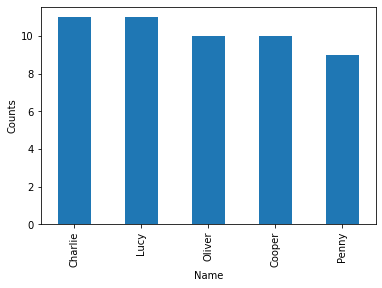

In [510]:
twitter_archive_master.name.value_counts()[:5].plot(kind='bar')
plt.xlabel('Name')
plt.ylabel('Counts')

In [435]:
source_count = twitter_archive_master.source.count()
sources = twitter_archive_master.source.value_counts()
source_per = sources / source_count * 100
source_per

Twitter for iPhone     93.657606
Vine - Make a Scene     4.339533
Twitter Web Client      1.478302
TweetDeck               0.524559
Name: source, dtype: float64

In [442]:
source_per.keys()

Index(['Twitter for iPhone', 'Vine - Make a Scene', 'Twitter Web Client',
       'TweetDeck'],
      dtype='object')

In [440]:
source_per.values

array([93.6576061 ,  4.33953267,  1.47830234,  0.52455889])

<AxesSubplot:ylabel='source'>

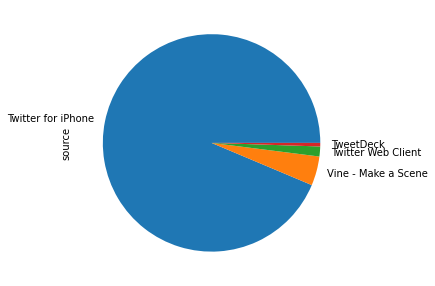

In [607]:
plt.subplots(figsize=(16, 5))
source_per.plot(kind='pie')

In [499]:
posts_per_weekday = twitter_archive_master.groupby(twitter_archive_master.timestamp.dt.day_name(locale ='en_US')).size() / twitter_archive_master.shape[0] * 100
posts_per_weekday

timestamp
Friday       13.924654
Monday       16.785885
Saturday     12.780162
Sunday       12.780162
Thursday     14.067716
Tuesday      14.878398
Wednesday    14.783023
dtype: float64

In [502]:
# Values are not in order of the week.
lst = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
posts_per_weekday = posts_per_weekday.reindex(lst)

Text(0, 0.5, 'Post Percentage')

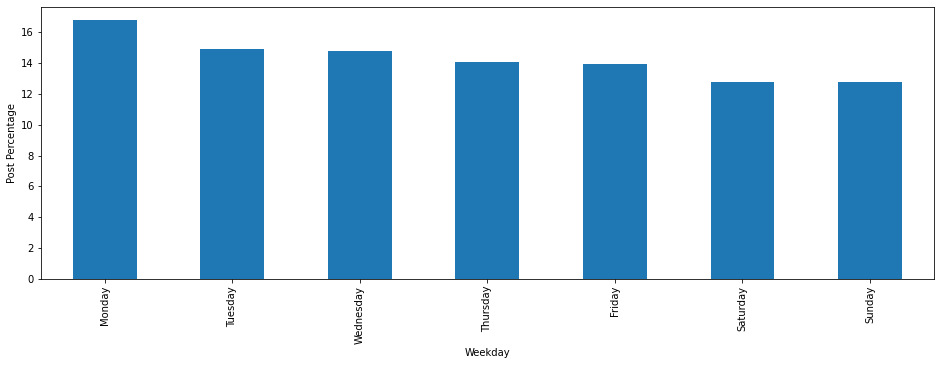

In [608]:
plt.subplots(figsize=(16, 5))
posts_per_weekday.plot(kind = 'bar')
plt.xlabel('Weekday')
plt.ylabel('Post Percentage')

In [516]:
posts_per_day = twitter_archive_master.groupby(twitter_archive_master.timestamp.dt.date).size()
type(posts_per_day)

pandas.core.series.Series

Text(0, 0.5, 'Total Posts per Day')

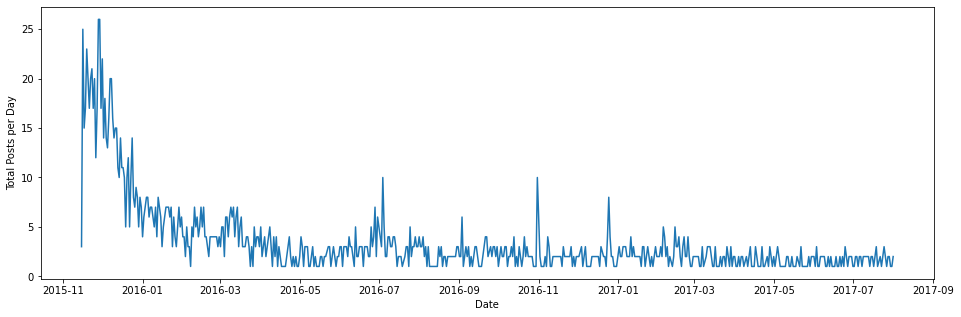

In [525]:
plt.subplots(figsize=(16, 5))
plt.plot(posts_per_day.index, posts_per_day.values)
plt.xlabel('Date')
plt.ylabel('Total Posts per Day')

In [521]:
mean_post_rating = twitter_archive_master.groupby(twitter_archive_master.timestamp.dt.date).like_count.mean()
mean_post_rating

timestamp
2015-11-15      836.666667
2015-11-16      750.080000
2015-11-17      266.333333
2015-11-18      432.117647
2015-11-19     2960.826087
                  ...     
2017-07-28    33702.000000
2017-07-29    26626.000000
2017-07-30    37030.000000
2017-07-31    22114.000000
2017-08-01    31655.500000
Name: like_count, Length: 598, dtype: float64

(0.0, 60000.0)

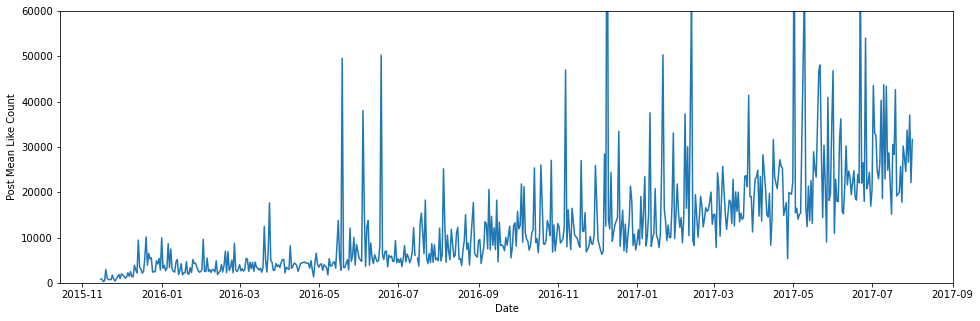

In [542]:
plt.subplots(figsize=(16, 5))
plt.plot(mean_post_rating.index, mean_post_rating.values)
plt.xlabel('Date')
plt.ylabel('Post Mean Like Count')
plt.ylim([0, 60000])

In [535]:
mean_post_retweet = twitter_archive_master.groupby(twitter_archive_master.timestamp.dt.date).retweet_count.mean()
mean_post_retweet

timestamp
2015-11-15     166.666667
2015-11-16     345.880000
2015-11-17     121.266667
2015-11-18     188.529412
2015-11-19    1127.739130
                 ...     
2017-07-28    8756.500000
2017-07-29    5204.500000
2017-07-30    7257.000000
2017-07-31    3502.000000
2017-08-01    6185.000000
Name: retweet_count, Length: 598, dtype: float64

(0.0, 15000.0)

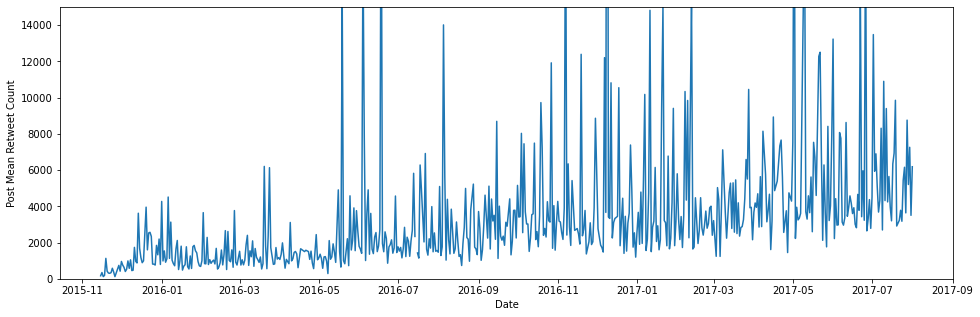

In [543]:
plt.subplots(figsize=(16, 5))
plt.plot(mean_post_retweet.index, mean_post_retweet.values)
plt.xlabel('Date')
plt.ylabel('Post Mean Retweet Count')
plt.ylim([0, 15000])

In [538]:
mean_post_retweet_year_weekday = twitter_archive_master.groupby([twitter_archive_master.timestamp.dt.year, twitter_archive_master.timestamp.dt.day_name(locale ='en_US')]).retweet_count.mean()
mean_post_retweet_year_weekday

timestamp  timestamp
2015       Friday        737.678571
           Monday        925.477876
           Saturday      707.963855
           Sunday       1027.936842
           Thursday      929.653061
           Tuesday       985.500000
           Wednesday     881.718750
2016       Friday       2675.930556
           Monday       2056.117318
           Saturday     2601.647482
           Sunday       2105.843750
           Thursday     2112.074324
           Tuesday      2159.416667
           Wednesday    2597.681529
2017       Friday       3662.387097
           Monday       5142.728814
           Saturday     5361.826087
           Sunday       4994.111111
           Thursday     4420.043478
           Tuesday      4674.327586
           Wednesday    5933.418182
Name: retweet_count, dtype: float64

In [548]:
mean_post_retweet_year_weekday.index

MultiIndex([(2015,    'Friday'),
            (2015,    'Monday'),
            (2015,  'Saturday'),
            (2015,    'Sunday'),
            (2015,  'Thursday'),
            (2015,   'Tuesday'),
            (2015, 'Wednesday'),
            (2016,    'Friday'),
            (2016,    'Monday'),
            (2016,  'Saturday'),
            (2016,    'Sunday'),
            (2016,  'Thursday'),
            (2016,   'Tuesday'),
            (2016, 'Wednesday'),
            (2017,    'Friday'),
            (2017,    'Monday'),
            (2017,  'Saturday'),
            (2017,    'Sunday'),
            (2017,  'Thursday'),
            (2017,   'Tuesday'),
            (2017, 'Wednesday')],
           names=['timestamp', 'timestamp'])

In [554]:
mean_post_retweet_year_weekday.unstack(level = 1)

timestamp,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
timestamp,,,,,,,
2015,737.678571,925.477876,707.963855,1027.936842,929.653061,985.500000,881.718750
2016,2675.930556,2056.117318,2601.647482,2105.843750,2112.074324,2159.416667,2597.681529
2017,3662.387097,5142.728814,5361.826087,4994.111111,4420.043478,4674.327586,5933.418182


In [555]:
mean_post_retweet_year_weekday.unstack(level = 1).index

Int64Index([2015, 2016, 2017], dtype='int64', name='timestamp')

In [558]:
mean_post_retweet_year_weekday.unstack(level = 1)['Friday']

timestamp
2015     737.678571
2016    2675.930556
2017    3662.387097
Name: Friday, dtype: float64

In [590]:
retweet_year_week = mean_post_retweet_year_weekday.unstack(level = 1)

Text(0, 0.5, 'Retweet Mean Per Weekday in 2015')

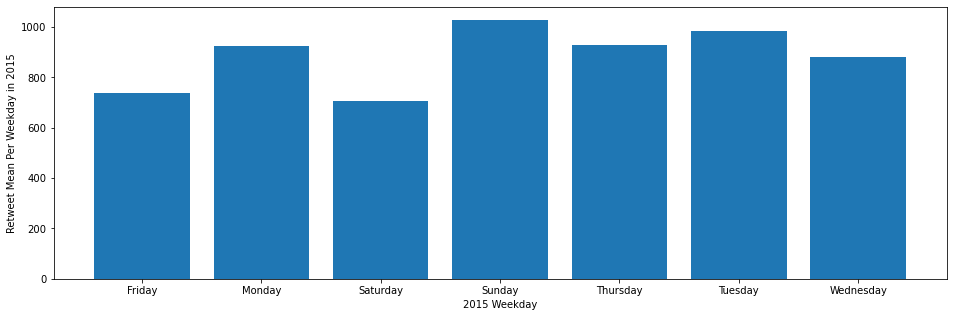

In [591]:
plt.subplots(figsize=(16, 5))
plt.bar(retweet_year_week.loc[2015].index, retweet_year_week.loc[2015].values)
plt.xlabel('2015 Weekday')
plt.ylabel('Retweet Mean Per Weekday in 2015')

Text(0, 0.5, 'Retweet Mean Per Weekday in 2016')

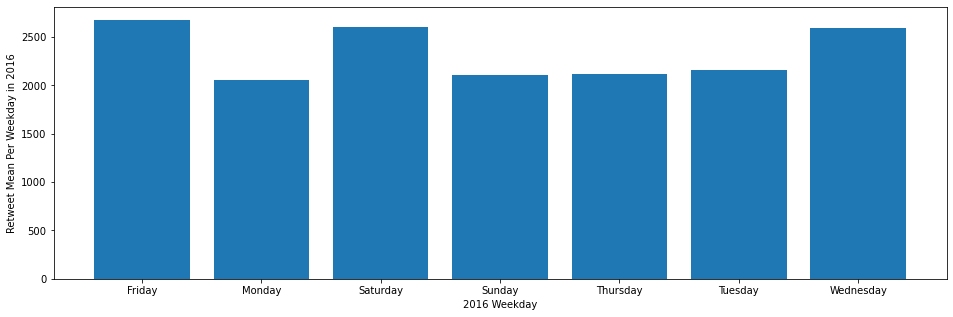

In [582]:
plt.subplots(figsize=(16, 5))
plt.bar(retweet_year_week.loc[2016].index, retweet_year_week.loc[2016].values)
plt.xlabel('2016 Weekday')
plt.ylabel('Retweet Mean Per Weekday in 2016')

Text(0, 0.5, 'Retweet Mean Per Weekday in 2017')

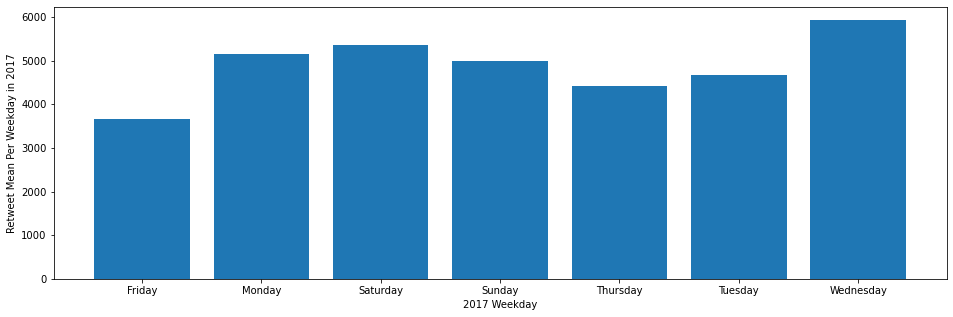

In [583]:
plt.subplots(figsize=(16, 5))
plt.bar(retweet_year_week.loc[2017].index, retweet_year_week.loc[2017].values)
plt.xlabel('2017 Weekday')
plt.ylabel('Retweet Mean Per Weekday in 2017')

In [599]:
mean_post_like = twitter_archive_master.groupby([twitter_archive_master.timestamp.dt.year, twitter_archive_master.timestamp.dt.day_name(locale ='en_US')]).like_count.mean()

In [600]:
mean_post_like

timestamp  timestamp
2015       Friday        1796.452381
           Monday        2274.858407
           Saturday      1806.746988
           Sunday        2601.957895
           Thursday      2368.989796
           Tuesday       2322.887755
           Wednesday     2071.468750
2016       Friday        7343.868056
           Monday        6109.402235
           Saturday      7234.539568
           Sunday        6478.953125
           Thursday      6261.445946
           Tuesday       6691.198718
           Wednesday     7445.668790
2017       Friday       16162.403226
           Monday       21551.016949
           Saturday     22127.130435
           Sunday       21788.444444
           Thursday     20140.043478
           Tuesday      20677.379310
           Wednesday    23837.254545
Name: like_count, dtype: float64

In [602]:
mean_post_like_df = mean_post_like.unstack(level = 1)
mean_post_like_df

timestamp,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
timestamp,,,,,,,
2015,1796.452381,2274.858407,1806.746988,2601.957895,2368.989796,2322.887755,2071.468750
2016,7343.868056,6109.402235,7234.539568,6478.953125,6261.445946,6691.198718,7445.668790
2017,16162.403226,21551.016949,22127.130435,21788.444444,20140.043478,20677.379310,23837.254545


Text(0, 0.5, 'Like Mean Per Weekday in 2015')

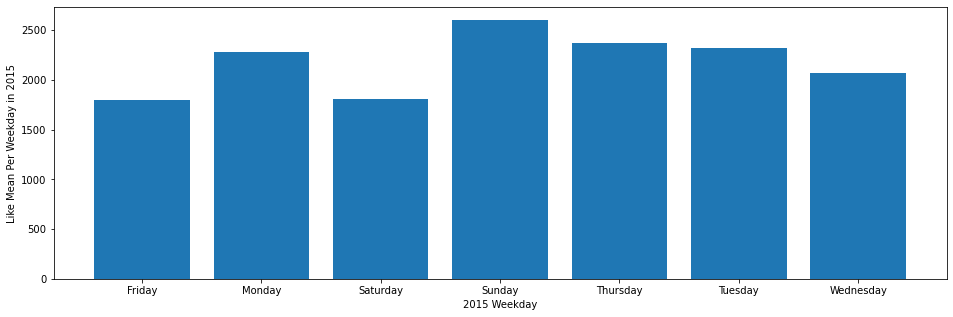

In [603]:
plt.subplots(figsize=(16, 5))
plt.bar(mean_post_like_df.loc[2015].index, mean_post_like_df.loc[2015].values)
plt.xlabel('2015 Weekday')
plt.ylabel('Like Mean Per Weekday in 2015')

Text(0, 0.5, 'Like Mean Per Weekday in 2016')

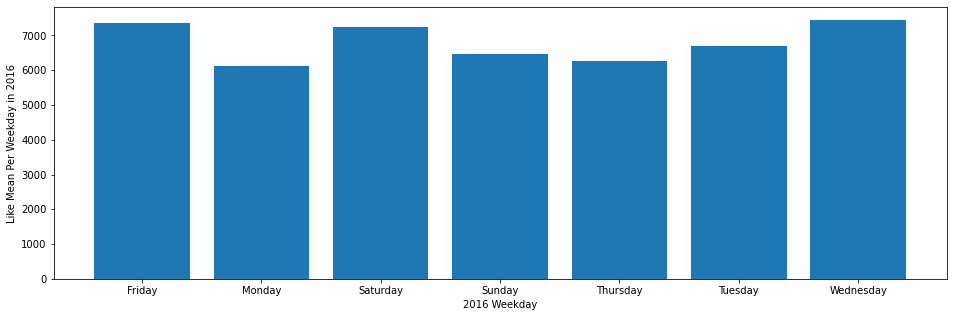

In [604]:
plt.subplots(figsize=(16, 5))
plt.bar(mean_post_like_df.loc[2016].index, mean_post_like_df.loc[2016].values)
plt.xlabel('2016 Weekday')
plt.ylabel('Like Mean Per Weekday in 2016')

Text(0, 0.5, 'Like Mean Per Weekday in 2017')

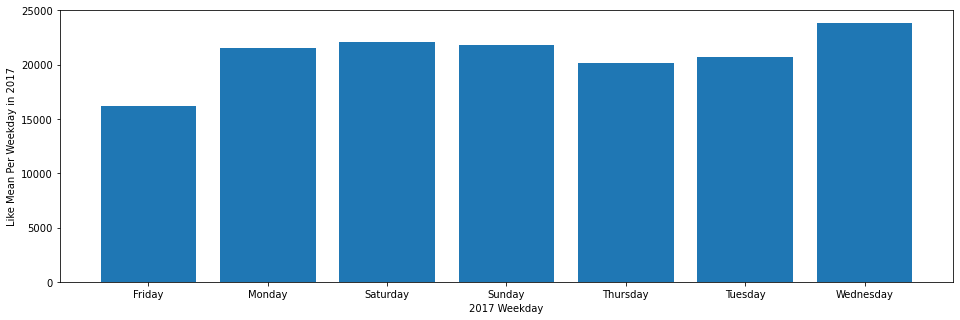

In [605]:
plt.subplots(figsize=(16, 5))
plt.bar(mean_post_like_df.loc[2017].index, mean_post_like_df.loc[2017].values)
plt.xlabel('2017 Weekday')
plt.ylabel('Like Mean Per Weekday in 2017')